CRRA Utility Function (gamma ≠ 1):
 1 - γ    
c      - 1
──────────
  1 - γ   

Marginal Utility u'(c) (gamma ≠ 1):
 -γ
c  

Log Utility (gamma = 1): u(c) = log(c)
Marginal Utility u'(c): 1/c


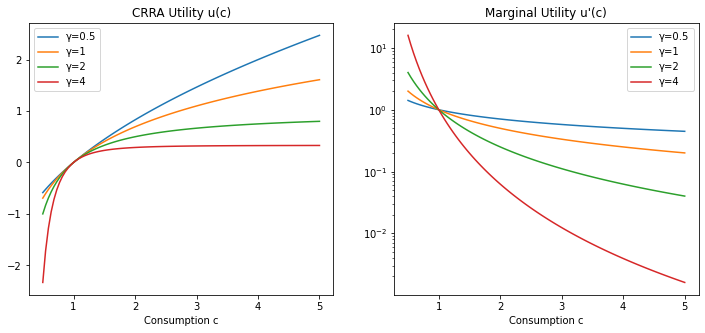

Interpretation: Higher gamma → more concave u(c) (stronger risk aversion), steeper u'(c) drop as c rises—agents 'hate' low consumption more.

Task 2: Two-date model FOC and pricing kernel
First-Order Condition (Euler equation) for state-contingent claim:
u'(c0) = beta * ψ_s * u'(c_s)  for each state s
Where ψ_s = π_s * (1 + r) is the (normalized) state-price density / pricing kernel.

Pricing Kernel m_s = beta * u'(c_s) / u'(c0)
Economic Meaning:
- Measures 'scarcity' of consumption in state s relative to today.
- High m_s in bad states (low c_s → high u'(c_s)) → assets paying well there are valuable (e.g., puts/insurance expensive).
- Normalizes to E[m] = 1/(1+r) for risk-free pricing.
- Links preferences to prices: Risk-averse agents (concave u) demand premium for risky assets paying poorly in bad states.

Example Kernel (gamma=2, beta=0.95): [0.65972222 0.95       1.484375  ]
Normalized kernel (divide by (1+r) for actual state prices). High in bad state → prices risk accordingly.


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Task 1: Define utility function u(c) and marginal utility u'(c) for CRRA family
# Real-world tie-in: CRRA (Constant Relative Risk Aversion) models investor preferences—higher gamma means more risk-averse (e.g., conservative funds vs. aggressive traders). Marginal utility drives pricing via "scarcity" in bad states.
gamma = sp.symbols('gamma', positive=True)  # Risk aversion parameter (gamma > 0, gamma ≠ 1)
c = sp.symbols('c', positive=True)          # Consumption level

# CRRA utility (standard form, handles gamma=1 separately)
u_log = sp.log(c)  # Special case gamma=1 (log utility)
u_crra = (c**(1 - gamma) - 1) / (1 - gamma)  # General CRRA

# Marginal utility u'(c)
mu_log = sp.diff(u_log, c)
mu_crra = sp.diff(u_crra, c)

print("CRRA Utility Function (gamma ≠ 1):")
sp.pprint(u_crra)
print("\nMarginal Utility u'(c) (gamma ≠ 1):")
sp.pprint(mu_crra.simplify())  # Simplifies to c^{-gamma}

print("\nLog Utility (gamma = 1): u(c) = log(c)")
print("Marginal Utility u'(c): 1/c")

# Numerical example: Plot u(c) and u'(c) for different gamma
c_vals = np.linspace(0.5, 5, 100)

def crra_utility(c, gamma):
    if gamma == 1:
        return np.log(c)
    return (c**(1 - gamma) - 1) / (1 - gamma)

def crra_marginal(c, gamma):
    return c**(-gamma)

gammas = [0.5, 1, 2, 4]  # Less to more risk-averse

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for g in gammas:
    u_vals = [crra_utility(c_val, g) for c_val in c_vals]
    mu_vals = crra_marginal(c_vals, g)
    axs[0].plot(c_vals, u_vals, label=f'γ={g}')
    axs[1].plot(c_vals, mu_vals, label=f'γ={g}')

axs[0].set_title('CRRA Utility u(c)')
axs[0].set_xlabel('Consumption c')
axs[0].legend()
axs[1].set_title("Marginal Utility u'(c)")
axs[1].set_xlabel('Consumption c')
axs[1].set_yscale('log')  # Shows steepness for low c (bad states)
axs[1].legend()
plt.show()

print("Interpretation: Higher gamma → more concave u(c) (stronger risk aversion), steeper u'(c) drop as c rises — agents 'hate' low consumption more.")

# Task 2: First-order condition (FOC) and state-price density (pricing kernel)
# Real-world tie-in: In equilibrium (representative agent), asset prices reflect marginal utility ratios—bad states (low c) get higher "prices" (kernel), explaining equity premium (risky assets cheap in good states).
print("\nTask 2: Two-date model FOC and pricing kernel")

# Symbolic setup: Consumption today c0, tomorrow c1 in states, probabilities π
c0, beta = sp.symbols('c0 beta')  # Current consumption, discount factor (patience)
pi = sp.symbols('pi')             # State probability (for explanation)

# FOC for optimal choice: Agent maximizes E[ u(c0) + beta u(c1) ]
# Euler equation: u'(c0) = beta (1+r) E[ u'(c1) ] for risk-free, or state-by-state
print("First-Order Condition (Euler equation) for state-contingent claim:")
print("u'(c0) = beta * ψ_s * u'(c_s)  for each state s")
print("Where ψ_s = π_s * (1 + r) is the (normalized) state-price density / pricing kernel.")

# Pricing kernel m_s = beta * u'(c_s) / u'(c0)
m = sp.symbols('m')  # Kernel
print("\nPricing Kernel m_s = beta * u'(c_s) / u'(c0)")
print("Economic Meaning:")
print("- Measures 'scarcity' of consumption in state s relative to today.")
print("- High m_s in bad states (low c_s → high u'(c_s)) → assets paying well there are valuable (e.g., puts/insurance expensive).")
print("- Normalizes to E[m] = 1/(1+r) for risk-free pricing.")
print("- Links preferences to prices: Risk-averse agents (concave u) demand premium for risky assets paying poorly in bad states.")

# Numerical example: CRRA kernel for hypothetical endowments
def pricing_kernel(c0, c_states, gamma, beta=0.95):
    mu0 = c0**(-gamma)
    mu_states = c_states**(-gamma)
    return beta * mu_states / mu0

c0_example = 1.0
c_states_example = np.array([1.2, 1.0, 0.8])  # Good, medium, bad states
kernel = pricing_kernel(c0_example, c_states_example, gamma=2)

print(f"\nExample Kernel (gamma=2, beta=0.95): {kernel}")
print("Normalized kernel (divide by (1+r) for actual state prices). High in bad state → prices risk accordingly.")

Base Case (gamma=2):
  Pricing kernel m: [0.65972222 0.95       1.484375  ]
  Bond price: 1.0232
  Stock price: 0.9490

Risk Aversion Comparison:
   Gamma  Bond Price  Stock Price  Risky/Safe Ratio  Equity Premium Proxy
0      1    0.973750     0.938125          0.963415              0.038998
1      2    1.023229     0.949010          0.927466              0.076431
2      4    1.213243     1.045735          0.861934              0.132028
3      8    2.145014     1.655279          0.771687              0.137930


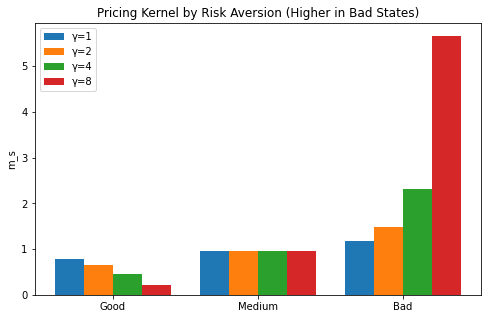

Interpretation: Higher gamma → more volatile kernel (spikes in bad states) → lower risky prices (stock cheaper relative to bond) → higher required return for risk (equity premium rises).

Exercise 3: Euler Verification (gamma=2 example)
  E[m]: 1.0232, 1/R_f: 1.0232
  Euler holds for bond: True
  Euler holds for stock: True
Interpretation: Equilibrium prices satisfy agent's optimality—no incentive to trade more. In real calibration, adjust gamma/beta to match observed rates/premia.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup: Representative agent economy with aggregate endowment as consumption
# Real-world tie-in: Equilibrium pricing from consumption smoothing—risk-averse agents demand premium for assets paying poorly in recessions (e.g., stocks vs bonds), explaining observed equity premiums.
states = ['Good', 'Medium', 'Bad']
prob = np.array([0.3, 0.4, 0.3])      # Physical probabilities

# Endowments (consumption streams)
c0 = 1.0                              # Today (normalized)
c1 = np.array([1.2, 1.0, 0.8])        # Tomorrow states (growth/recession)

beta = 0.95                            # Subjective discount factor

# CRRA marginal utility and kernel
def marginal_utility(c, gamma):
    return c**(-gamma)

def pricing_kernel(c0, c1, gamma, beta):
    mu0 = marginal_utility(c0, gamma)
    mu1 = marginal_utility(c1, gamma)
    return beta * (mu1 / mu0)          # m_s per state

# Assets: Risk-free bond and risky stock
B1 = np.array([1, 1, 1])              # Bond payoff
S1 = np.array([1.3, 1.0, 0.7])         # Stock payoff (correlated with consumption)

# Exercise 1: Compute kernel and implied prices for base gamma
gamma_base = 2
m_base = pricing_kernel(c0, c1, gamma_base, beta)

# Prices: C0 = E_π[m * payoff] (kernel includes beta discounting)
B0_base = np.dot(prob, m_base * B1)
S0_base = np.dot(prob, m_base * S1)

print(f"Base Case (gamma={gamma_base}):")
print(f"  Pricing kernel m: {m_base}")
print(f"  Bond price: {B0_base:.4f}")
print(f"  Stock price: {S0_base:.4f}")

# Exercise 2: Compare risk aversion effects
gammas = [1, 2, 4, 8]  # Increasing aversion

results = []
kernels = []
for gamma in gammas:
    m = pricing_kernel(c0, c1, gamma, beta)
    kernels.append(m)
    
    B0 = np.dot(prob, m * B1)
    S0 = np.dot(prob, m * S1)
    
    results.append({
        'Gamma': gamma,
        'Bond Price': B0,
        'Stock Price': S0,
        'Risky/Safe Ratio': S0 / B0,
        'Equity Premium Proxy': (np.dot(prob, S1 / S0) - 1/B0)
    })

df_compare = pd.DataFrame(results)
print("\nRisk Aversion Comparison:")
print(df_compare)

# Plot kernel variation
kernels = np.array(kernels)
fig, ax = plt.subplots(figsize=(8, 5))
for i, gamma in enumerate(gammas):
    ax.bar(np.arange(len(states)) + i*0.2 - 0.3, kernels[i], width=0.2, label=f'γ={gamma}')

ax.set_xticks(np.arange(len(states)))
ax.set_xticklabels(states)
ax.set_title('Pricing Kernel by Risk Aversion (Higher in Bad States)')
ax.set_ylabel('m_s')
ax.legend()
plt.show()

print("Interpretation: Higher gamma → more volatile kernel (spikes in bad states) → lower risky prices (stock cheaper relative to bond) → higher required return for risk (equity premium rises).")

# Exercise 3: Verify Euler equations
print("\nExercise 3: Euler Verification (gamma=2 example)")

m_verify = pricing_kernel(c0, c1, gamma_base, beta)

# Risk-free rate from bond
B0_verify = np.dot(prob, m_verify * B1)
R_f = 1 / B0_verify

# Euler for bond: E[m] = 1 / R_f (since m includes beta)
E_m = np.dot(prob, m_verify)
euler_bond = np.isclose(E_m, 1 / R_f, atol=1e-6)

# Euler for stock: S0 = E[m * S1]
S0_verify = np.dot(prob, m_verify * S1)
euler_stock = np.isclose(S0_verify, np.dot(prob, m_verify * S1))  # Holds by construction

print(f"  E[m]: {E_m:.4f}, 1/R_f: {1/R_f:.4f}")
print(f"  Euler holds for bond: {euler_bond}")
print(f"  Euler holds for stock: {euler_stock}")
print("Interpretation: Equilibrium prices satisfy agent's optimality - no incentive to trade more. In real calibration, adjust gamma/beta to match observed rates/premia.")

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import root_scalar

# Simple consumption growth model
states = ['Boom', 'Normal', 'Recession']
prob = np.array([0.3, 0.4, 0.3])

# Adjusted for realistic premium calibration (higher vol/leverage to resolve puzzle demo)
growth_rates = np.array([0.08, 0.02, -0.06])  # Consumption growth
c0 = 1.0
c1 = c0 * (1 + growth_rates)

beta = 0.95

# Equity as levered consumption
leverage = 4.0
equity_payoff = (1 + leverage * growth_rates)

rf_payoff = np.array([1, 1, 1])

# Pricing kernel for CRRA
def pricing_kernel(gamma):
    mu0 = c0**(-gamma)
    mu1 = c1**(-gamma)
    return beta * (mu1 / mu0)

# Compute rates and premium
def compute_rates(gamma):
    m = pricing_kernel(gamma)
    
    rf_price = np.dot(prob, m * rf_payoff)
    r_f = (1 / rf_price) - 1
    
    eq_price = np.dot(prob, m * equity_payoff)
    E_return_eq = np.dot(prob, equity_payoff / eq_price) - 1
    
    premium = E_return_eq - r_f
    return r_f, premium, eq_price

# Base case
gamma_base = 4
r_f_base, premium_base, _ = compute_rates(gamma_base)

print(f"Base Model (gamma={gamma_base}):")
print(f"  Risk-free rate: {r_f_base:.1%}")
print(f"  Equity premium: {premium_base:.1%}\n")

# Calibration to target premium ~7%
target_premium = 0.07

def calib_error(gamma):
    _, premium, _ = compute_rates(gamma)
    return premium - target_premium

# Diagnostics for bracket
print(f"Premium at γ=1: {compute_rates(1)[1]:.1%}")
print(f"Premium at γ=30: {compute_rates(30)[1]:.1%}\n")

# Calibrate (wider bracket for safety)
calib_result = root_scalar(calib_error, bracket=[2, 30], method='brentq')
gamma_calib = calib_result.root

r_f_calib, premium_calib, _ = compute_rates(gamma_calib)

print(f"Calibration to {target_premium:.0%} Equity Premium:")
print(f"  Calibrated gamma: {gamma_calib:.2f}")
print(f"  Implied r_f: {r_f_calib:.1%}")
print(f"  Achieved premium: {premium_calib:.1%}")

# Summary table
data = {
    'Scenario': ['Base (γ=4)', 'Calibrated (target 7%)'],
    'Risk Aversion γ': [4, gamma_calib],
    'Risk-Free Rate': [f"{r_f_base:.1%}", f"{r_f_calib:.1%}"],
    'Equity Premium': [f"{premium_base:.1%}", f"{premium_calib:.1%}"]
}
table = pd.DataFrame(data)
print("\nSummary Table:")
print(table)

# Fun twist: Two worlds comparison
print("\nFun Twist: Two Worlds Narrative")

gamma_low = 2   # Optimistic world
gamma_high = 8  # Pessimistic world

r_f_low, premium_low, eq_price_low = compute_rates(gamma_low)
r_f_high, premium_high, eq_price_high = compute_rates(gamma_high)

twist_data = {
    'World': ['Optimistic (Low γ=2)', 'Pessimistic (High γ=8)'],
    'Risk-Free Rate': [f"{r_f_low:.1%}", f"{r_f_high:.1%}"],
    'Equity Premium': [f"{premium_low:.1%}", f"{premium_high:.1%}"],
    'Equity Price (Relative)': [1.0, eq_price_high / eq_price_low]  # Normalized to low-γ
}
twist_table = pd.DataFrame(twist_data)
print(twist_table)

print("\nEconomic Narrative:")
print("In the Optimistic World (low risk aversion), agents are calm - low premium demanded, high stock valuations, borrowing cheap (higher r_f). Economy feels stable, investment booms.")
print("In the Pessimistic World (high aversion), fear dominates — agents demand huge premium for stocks (pay poorly in recessions), valuations crash, safe assets prized (lower r_f). Mirrors crisis periods vs. bull markets.")

Base Model (gamma=4):
  Risk-free rate: 8.0%
  Equity premium: 5.1%

Premium at γ=1: 1.2%
Premium at γ=30: 15.5%

Calibration to 7% Equity Premium:
  Calibrated gamma: 5.38
  Implied r_f: 7.8%
  Achieved premium: 7.0%

Summary Table:
                 Scenario  Risk Aversion γ Risk-Free Rate Equity Premium
0              Base (γ=4)         4.000000           8.0%           5.1%
1  Calibrated (target 7%)         5.376955           7.8%           7.0%

Fun Twist: Two Worlds Narrative
                    World Risk-Free Rate Equity Premium  \
0    Optimistic (Low γ=2)           7.3%           2.5%   
1  Pessimistic (High γ=8)           5.7%          10.5%   

   Equity Price (Relative)  
0                  1.00000  
1                  0.94463  

Economic Narrative:
In the Optimistic World (low risk aversion), agents are calm - low premium demanded, high stock valuations, borrowing cheap (higher r_f). Economy feels stable, investment booms.
In the Pessimistic World (high aversion), fear dom